In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import encodings_solution_1, encodings_solution_2

In this notebook, you'll be working with the Pokémon dataset from the univariate plots lesson.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [53]:
# calculate stastics of special-defense
pokemon['special-defense'].describe()

count    807.000000
mean      70.013631
std       27.292344
min       20.000000
25%       50.000000
50%       65.000000
75%       85.000000
max      230.000000
Name: special-defense, dtype: float64

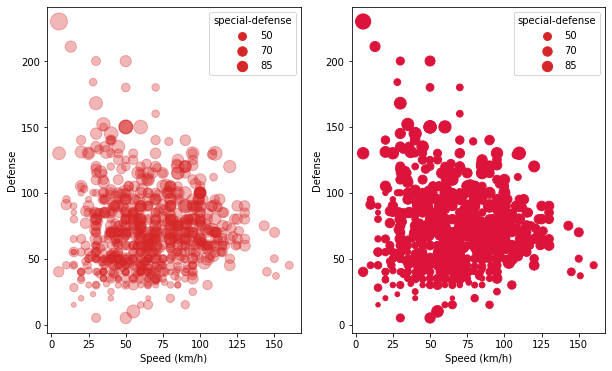

In [62]:
# make a scatter plot to determine if there exisits a negative correlation between speed and defense

plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
sb.regplot(data = pokemon, x = 'speed', y = 'defense', x_jitter=0.1, y_jitter = 0.1, 
           fit_reg = False, color = sb.color_palette()[3],scatter_kws ={'s': pokemon['special-defense']/0.8, 'alpha':1/3}); # s parameter used to encode point size
plt.xlabel('Speed (km/h)')
plt.ylabel('Defense')

# dummy series for adding legend
sizes = [50, 70, 85]
base_color = sb.color_palette()[3]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/0.8, color = base_color))
    plt.legend(legend_obj, sizes, title = 'special-defense')
    

# use matplotlib to creat scatter plot    
plt.subplot(1,2,2)
plt.scatter(data = pokemon, x ='speed', y ='defense', s = 'special-defense', c = 'crimson');
plt.xlabel('Speed (km/h)')
plt.ylabel('Defense')

sizes = [50, 70, 85]
base_color = sb.color_palette()[3]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/0.8, color = base_color))
    plt.legend(legend_obj, sizes, title = 'special-defense')


When creating the plot, I made the figure size bigger and set axis limits to zoom into the majority of data points. I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.


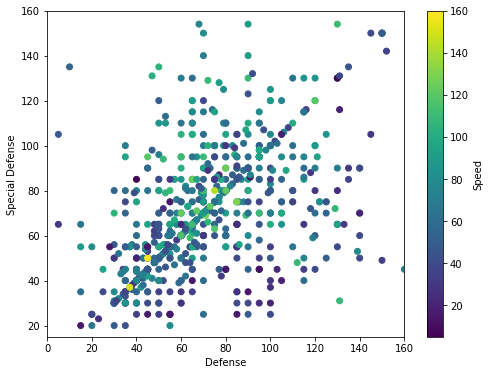

In [63]:
# run this cell to check your work against ours
encodings_solution_1()

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [ ]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [ ]:
# YOUR CODE HERE

In [ ]:
# run this cell to check your work against ours
encodings_solution_2()